# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

## imports for Python, Pandas

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,shortname,info.governor,state
0,Dade,12345,FL,Rick Scott,Florida
1,Broward,40000,FL,Rick Scott,Florida
2,Palm Beach,60000,FL,Rick Scott,Florida
3,Summit,1234,OH,John Kasich,Ohio
4,Cuyahoga,1337,OH,John Kasich,Ohio


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

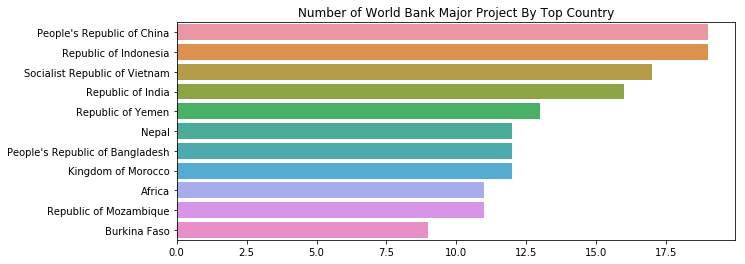

In [2]:
# Excercise 1

#loading world bank
world_bank = pd.read_json('data/world_bank_projects.json')

#find the 10 top countries in world_bank
world_bank.groupby("countryname").size().sort_values(ascending=False).head(11)
#The top 10 countries with projects are
#1)People's Republic of China
#2)Republic of Indonesia
#3)Socialist Republic of Vietnam  
#4)Republic of India
#5)Republic of Yemen 
#6)Nepal
#7)People's Republic of Bangladesh
#8)Kingdom of Morocco
#9)Republic of Mozambique 
#10)Burkina Faso
#* Africa was excluded because it is a continent, not a country. These projects are most likely
#  coorperations involving multiple countries

#barplot chart
project_countries =world_bank.groupby("countryname").size().sort_values(ascending=False).head(11)
plt.figure(figsize=(10,4))
sns.barplot(y=project_countries.index,x=project_countries.values)
plt.title('Number of World Bank Major Project By Top Country')
plt.ylabel('')
plt.show()


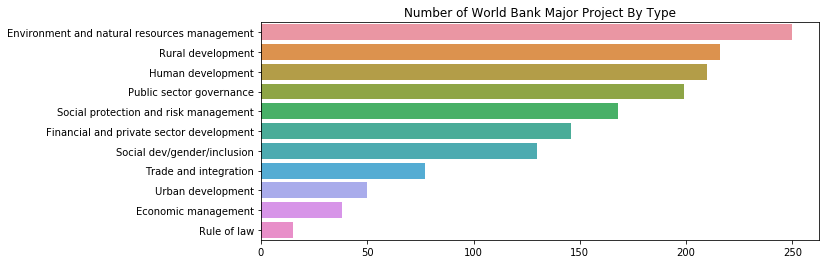

In [4]:
# Excercise 2 and 3

#Create DataFrame for the major themes of the world bank projects.
world_json = json.load((open('data/world_bank_projects.json')))
world_mjtheme = json_normalize(world_json,'mjtheme_namecode')

#Create dataframe that links the major themes codes and names.
link_missing_names = set(tuple(zip(world_mjtheme['code'],world_mjtheme['name'])))
link = (x for x in link_missing_names if x[1] != '')
df_link = pd.DataFrame(link,columns=['code','name'])

#Use a left join to add major theme names to world_mjtheme.
#Also make sure that code columns are the same type so they 
#merge correctly.
world_mjtheme['code'] = world_mjtheme['code'].astype(int)
df_link['code'] = df_link['code'].astype(int)
world_merged = world_mjtheme.merge(df_link,how='left',on='code')

# Delete old name column (name_x) and replace with the new name
#column (name_y) with no missing entries. 
#This part completes excercise 3
world_merged.drop(columns='name_x',inplace=True)
world_merged.rename(columns={'name_y':'name'},inplace=True)

#Finally group by name in order to determine the 10 major project themes. 
world_merged.groupby('name').size().sort_values(ascending=False).head(10)
#The top 10 project themes are
#1) Environment and natural resources management
#2) Rural development
#3) Human development
#4) Public sector governance 
#5) Social protection and risk management
#6) Financial and private sector development
#7) Social dev/gender/inclusion  
#8) Trade and integration
#9) Urban development
#10) Economic management


#barplot chart
project_themes = world_merged.groupby('name').size().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(y=project_themes.index,x=project_themes.values)
plt.title('Number of World Bank Major Project By Type')
plt.ylabel('')
plt.show()
